**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [7]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load(open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json"))
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0,0.5,'endogenous')

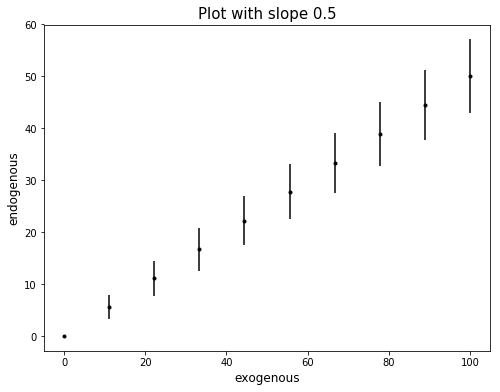

In [30]:
x = np.linspace(0, 100, num=10)
y = line(0.5, x, b=0, errors=None)

plt.figure(figsize = (8,6)) 
plt.errorbar(x, y, yerr=errors(y),fmt=".k")
plt.title('Plot with slope 0.5', fontsize = 15)
plt.xlabel('exogenous', fontsize = 12)
plt.ylabel('endogenous', fontsize = 12)

Fig 1: 

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [23]:
print(y)

[  0.           5.55555556  11.11111111  16.66666667  22.22222222
  27.77777778  33.33333333  38.88888889  44.44444444  50.        ]


In [24]:
print(x)

[   0.           11.11111111   22.22222222   33.33333333   44.44444444
   55.55555556   66.66666667   77.77777778   88.88888889  100.        ]


In [25]:
print(sm.add_constant(x))

[[   1.            0.        ]
 [   1.           11.11111111]
 [   1.           22.22222222]
 [   1.           33.33333333]
 [   1.           44.44444444]
 [   1.           55.55555556]
 [   1.           66.66666667]
 [   1.           77.77777778]
 [   1.           88.88888889]
 [   1.          100.        ]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [26]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:26:23   Log-Likelihood:                    inf
No. Observations:                  10   AIC:                              -inf
Df Residuals:                       9   BIC:                              -inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.5000          0        inf      0.000         0.500     0.500
==============================================================================
Omnibus:                        1.049   Durbin-Watson:                     nan
Prob(Omnibus):                  0.592   Jarque-Bera (JB):                3.750
Skew:                           0.000   Prob(JB):                        0.153
Kurtosis:                       0.000   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#THE RIGHT WAY
smfit_right = smf.OLS(y, sm.add_constant(x)).fit()
smfit_right.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.149e+32
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          1.14e-127
Time:                        15:30:50   Log-Likelihood:                 321.86
No. Observations:                  10   AIC:                            -639.7
Df Residuals:                       8   BIC:                            -639.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2.665e-15   1.67e-15      1.594      0.150     -1.19e-15  6.52e-15
x1             0.5000   2.82e-17   1.77e+16      0.000         0.500     0.500
==============================================================================
Omnibus:                        7.053   Durbin-Watson:                   0.207
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                1.482
Skew:                           0.296   Prob(JB):                        0.477
Kurtosis:                       1.209   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Discussion: 

# 4. plot the data (as points) and both statsmodels fits

Text(0.5,1,'Plotting data the wrong way')

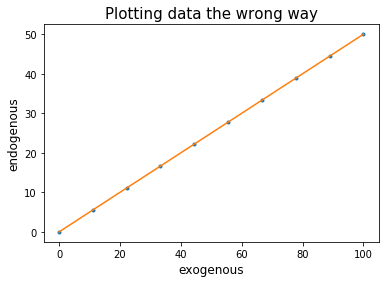

In [35]:
plt.plot(x, y, '.')
plt.plot(x, smfit.fittedvalues, '-')
plt.xlabel('exogenous', fontsize = 12)
plt.ylabel('endogenous', fontsize = 12)
plt.title('Plotting data the wrong way', fontsize = 15)

Fig 2: 

Text(0.5,1,'Plotting data the right way')

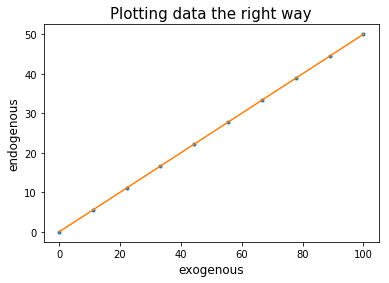

In [38]:
plt.plot(x, y, '.')
plt.plot(x, smfit_right.fittedvalues, '-')
plt.xlabel('exogenous', fontsize = 12)
plt.ylabel('endogenous', fontsize = 12)
plt.title('Plotting data the right way', fontsize = 15)

Fig 3:

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0,0.5,'endogenous')

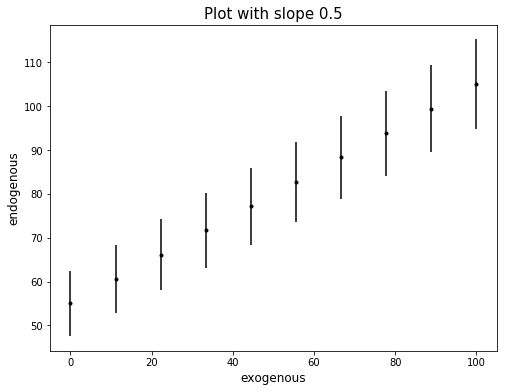

In [40]:
x = np.linspace(0, 100, num=10)
y = line(0.5, x, b = 55, errors=None)

plt.figure(figsize = (8,6)) 
plt.errorbar(x, y, yerr=errors(y),fmt=".k")
plt.title('Plot with slope 0.5', fontsize = 15)
plt.xlabel('exogenous', fontsize = 12)
plt.ylabel('endogenous', fontsize = 12)

Fig :

# 6. repeat step 3

In [41]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     59.40
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.98e-05
Time:                        16:07:55   Log-Likelihood:                -48.064
No. Observations:                  10   AIC:                             98.13
Df Residuals:                       9   BIC:                             98.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.2816      0.166      7.707      0.000         0.905     1.658
==============================================================================
Omnibus:                        0.978   Durbin-Watson:                   0.078
Prob(Omnibus):                  0.613   Jarque-Bera (JB):                0.624
Skew:                           0.000   Prob(JB):                        0.732
Kurtosis:                       1.776   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#THE RIGHT WAY
smfit_right = smf.OLS(y, sm.add_constant(x)).fit()
smfit_right.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.242e+31
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          4.44e-123
Time:                        16:08:31   Log-Likelihood:                 308.65
No. Observations:                  10   AIC:                            -613.3
Df Residuals:                       8   BIC:                            -612.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         55.0000   6.26e-15   8.78e+15      0.000        55.000    55.000
x1             0.5000   1.06e-16   4.73e+15      0.000         0.500     0.500
==============================================================================
Omnibus:                        7.069   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                1.276
Skew:                           0.000   Prob(JB):                        0.528
Kurtosis:                       1.250   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            WLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     134.8
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           2.75e-06
Time:                        12:14:01   Log-Likelihood:                -29.722
No. Observations:                  10   AIC:                             63.44
Df Residuals:                       8   BIC:                             64.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.5287      2.356     30.781      0.000      67.095      77.962
x1             0.6314      0.054     11.612      0.000       0.506       0.757
==============================================================================
Omnibus:                        1.226   Durbin-Watson:                   2.491
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                0.720
Skew:                           0.203   Prob(JB):                        0.698
Kurtosis:                       1.750   Cond. No.                         70.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

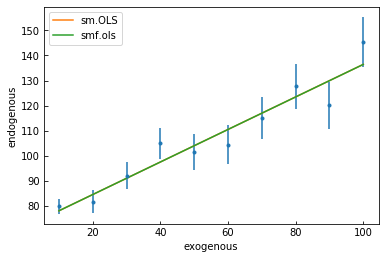

In [39]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();